<a href="https://colab.research.google.com/github/DonRoboto/Financial_Models/blob/master/IPC_PreProc_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV,SelectPercentile,mutual_info_classif, f_regression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Leer datos de las 35 acciones del S&P/IPC

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/DonRoboto/Financial_Models/master/DATOS_2017_2019.csv", na_values=["?"])
data.columns
rows, cols = data.shape
print(rows)

753


Sustituir datos Nan

In [3]:
data_inter = data.interpolate(method='pad')
data_inter.head(5)

,FECHA,IPC,AC,ALFAA,ALPEKA,ALSEA,AMXL,ASURB,BBAJIOO,BIMBOA,BOLSAA,BSMXB,CEMEXCPO,CUERVO,ELEKTRA,FEMSAUBD,GAPB,GCARSOA1,GCC,GENTERA,GFINBURO,GFNORTEO,GMEXICOB,GRUMAB,IENOVA,KIMBERA,KOFUBL,LABB,LIVEPOLC,MEGACPO,OMAB,ORBIA,PE&OLES,PINFRA,RA,TLEVICPO,WALMEX
0,02/01/2017,45695.10156,99.911522,25.536209,24.551247,58.077705,12.140015,285.105438,285.105438,45.850071,45.850071,45.850071,15.502251,15.502251,257.427063,155.133850,140.042267,79.752678,66.993721,29.452826,29.372025,90.457375,48.839161,241.859055,89.911034,31.570374,31.570374,21.520000,145.570206,64.725891,71.019760,44.208355,347.102417,162.801025,107.274452,84.905945,34.945587
1,03/01/2017,46123.35938,98.839096,25.615704,24.422392,58.214748,12.587231,285.410889,285.410889,45.294140,45.294140,45.294140,15.502251,15.502251,259.420837,158.695633,137.873642,77.301819,66.993721,29.294001,28.398260,89.502396,49.704636,237.878632,90.707314,30.868612,30.868612,21.500000,142.202240,63.168587,71.520355,43.832912,363.187103,160.024628,108.407867,88.546738,35.539799
2,04/01/2017,46587.73828,99.421532,25.257994,24.224161,58.067913,12.773569,290.317474,290.317474,45.879333,45.879333,45.879333,15.933480,15.933480,260.447083,158.833359,140.765152,76.777344,66.993721,29.249884,28.922594,88.379417,50.163342,244.285873,91.971436,30.682608,30.682608,20.860001,139.019318,62.319996,71.496513,45.268982,368.284912,161.238708,107.748260,91.991257,35.605824
3,05/01/2017,46719.98828,99.060974,25.665380,24.739565,57.705723,12.559278,292.780304,292.780304,46.123165,46.123165,46.123165,15.952197,15.952197,261.932648,160.358444,140.379089,76.271896,66.993721,29.435177,29.091129,88.547424,51.487537,252.731445,91.951523,29.904762,29.904762,21.000000,141.180222,61.014477,70.582748,47.897083,393.747162,159.883453,107.404518,90.558495,35.285137
4,06/01/2017,46071.57031,97.091782,25.715063,25.175680,56.452740,12.540645,288.370087,288.370087,46.445026,46.445026,46.445026,15.952197,15.952197,261.356018,157.485413,136.411423,77.959839,66.993721,29.461645,28.136095,86.115776,50.371059,252.943329,91.652924,29.803303,29.803303,20.870001,140.518295,61.266254,70.455605,47.380844,400.292511,156.523529,109.197540,87.948120,34.455124


Correlacion

In [4]:
corrMatrix = data_inter.corr()
print(corrMatrix)

               IPC        AC     ALFAA  ...        RA  TLEVICPO    WALMEX
IPC       1.000000  0.855751  0.713083  ...  0.693822  0.842750 -0.607231
AC        0.855751  1.000000  0.574865  ...  0.544004  0.681191 -0.505315
ALFAA     0.713083  0.574865  1.000000  ...  0.423629  0.812232 -0.713972
ALPEKA   -0.018300 -0.034186  0.192667  ...  0.302967 -0.143208  0.323806
ALSEA     0.844561  0.825054  0.702412  ...  0.688081  0.781005 -0.516196
AMXL      0.375344  0.468633 -0.088905  ...  0.446452 -0.005434  0.149829
ASURB     0.693416  0.629456  0.376852  ...  0.589560  0.407264 -0.176741
BBAJIOO   0.236254  0.109734  0.528641  ...  0.030259  0.548564 -0.567436
BIMBOA    0.687498  0.567549  0.685394  ...  0.251430  0.764350 -0.840432
BOLSAA    0.681206  0.542265  0.576151  ...  0.360918  0.777696 -0.777512
BSMXB     0.548635  0.364116  0.653162  ...  0.214797  0.755522 -0.753974
CEMEXCPO  0.877767  0.724684  0.837981  ...  0.447838  0.963136 -0.880285
CUERVO    0.209345  0.369679 -0.208021

Graficamente

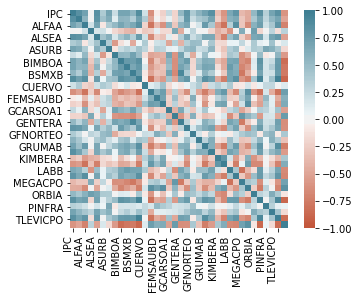

In [13]:
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

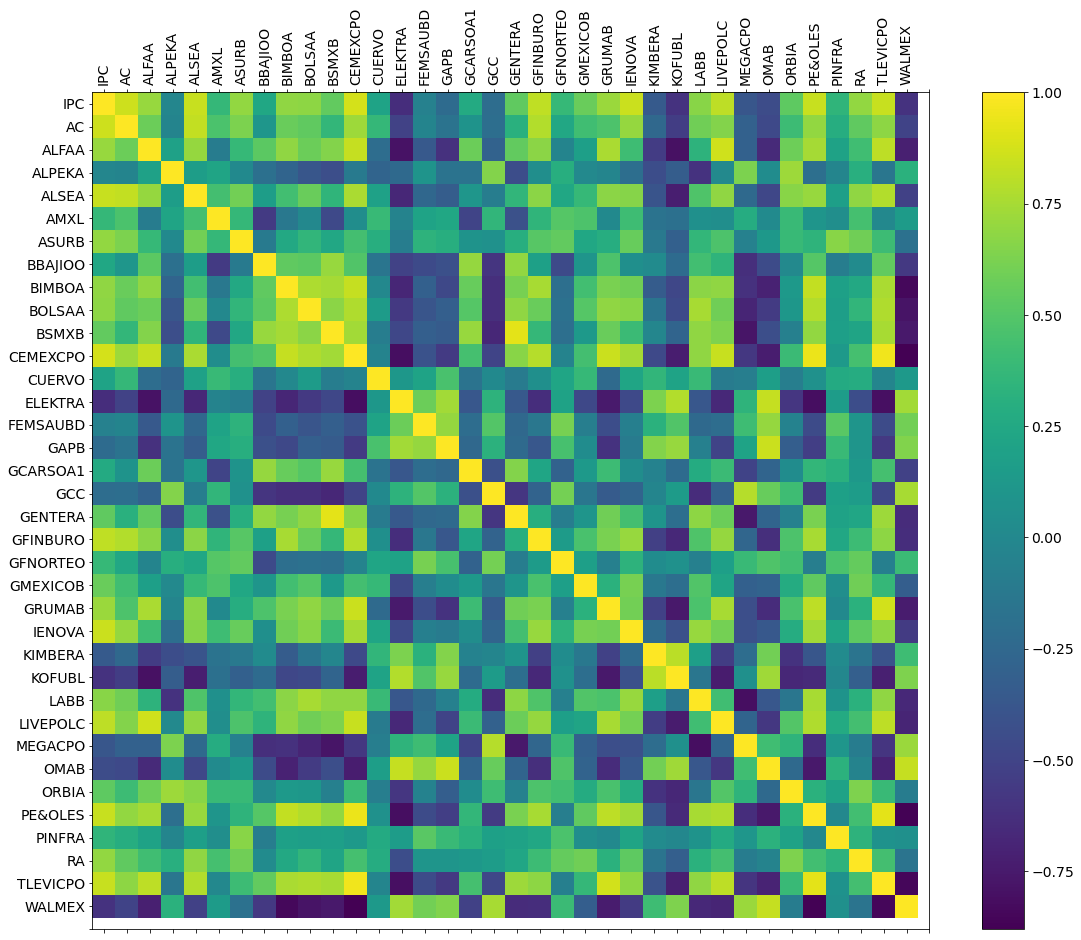

In [6]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corrMatrix, fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns[1:], fontsize=14, rotation=90)
plt.yticks(range(data.shape[1]), data.columns[1:], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title(' ', fontsize=16);

##Estandarizacion de los datos


Definimos los datos que consideramos features para entrenamiento

In [9]:
rows_test = int(rows * 0.9)
rows_train = int(rows - rows_test)

X_train = data_inter.iloc[:rows_test,2:]
y_train = data_inter.iloc[:rows_test,1]

X_test = data_inter.iloc[rows_test:,2:]
y_test = data_inter.iloc[rows_test:,1]


677   76


In [0]:
#Initialize and fit scaler
scaler = StandardScaler()
#Fit scaler using the training data
scaler.fit(X_train)

#Transform the raw data
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [11]:
#Initialize and fit selector
MI_selector = SelectPercentile(f_regression, percentile=60)#Remove the lower 40%
MI_selector.fit(X_train_standardized,  y_train.values.ravel())

#Transform
X_train_MI = MI_selector.transform(X_train_standardized)
X_test_MI = MI_selector.transform(X_test_standardized)

#Summary
print("Feature Selection Results - Univariate Feature Selection")
#Summary
print("Filter Result:")
print("Number of features: ",X_train_MI.shape[1])

Feature Selection Results - Univariate Feature Selection
Filter Result:
Number of features:  21


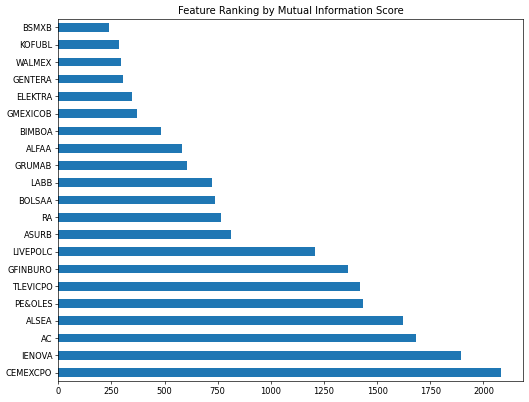

In [12]:
#Rank the features by scores
plt.figure(figsize=(10, 8), dpi= 60)
feat_scores = pd.Series(MI_selector.scores_, index=X_train.columns)
top_feat = feat_scores.nlargest(21)
top_feat.plot(kind='barh')
plt.title("Feature Ranking by Mutual Information Score")
plt.show()